# Customer Segmentation Analysis

### What is Customer Segmentation?

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group more effectively. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.


### Why Segment Customers?

Customer segmentation has the potential to allow companies to address each customer in the most effective way.<br>
Segmentation helps a company to Create and communicate targeted marketing startegy that will resonate with specific groups of customers, which improve customer service and establish better customer relationships.

### How to Segment Customers?

Customer segmentation requires a company to gather specific information – data – about customers and analyze it to identify patterns that can be used to create segments.<br>
Some of that can be gathered from purchasing information – job title, geography, products purchased etc.

**For this demo I am considering a hypothetical Mall Customer**<br>
When ever a customer applied for a membership for a Mall Customer. They need to fill the membership form, from which we can get the details like Name, Age, Gender, Annual Income etc. and based on how many times a customer visit the store and how much they spend, I am computing a spending score between 1-100 for each customer.

#### Typical information include:
* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## 2. Loading Dataset

In [2]:
dataset = pd.read_csv('./input/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Selecting features columns

In [3]:
df = dataset.iloc[:,3:5]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
#Features Matrix
X = df.values

## 4. Cluster Analysis

## First Step is to find the Number of Cluster
### a) Finding optimal number of cluster using dendrogram

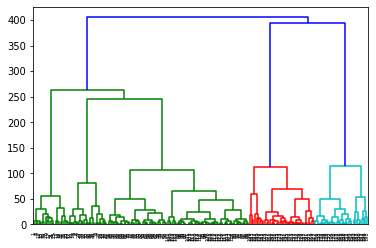

In [5]:
import scipy
from scipy.cluster import hierarchy

dendro = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))

From the above graph we can see that optimal number of custer will be 5.

### b) Finding the optimal number of cluster using Elbow method

Text(0, 0.5, 'inertia')

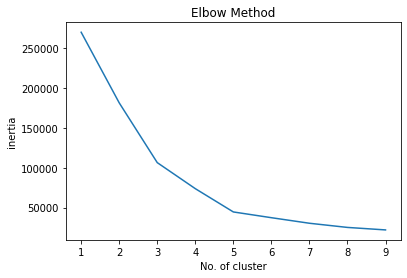

In [13]:
from sklearn.cluster import KMeans

inertia = []     # sum of dist. of sample to their closest cluster center
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('inertia' )

From elbow method also, the optimal number of cluster will be 5.

## 5. KMeans Clustering Model with 5 cluster

In [7]:
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(X)

cluster_label = kmeans_5.labels_
cluster_center = kmeans_5.cluster_centers_

In [8]:
cluster_pred = kmeans_5.predict([[20, 50], [30, 80]])
cluster_pred

array([3, 1])

In [9]:
cluster_label

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [10]:
cluster_center

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

## 6. Visualization

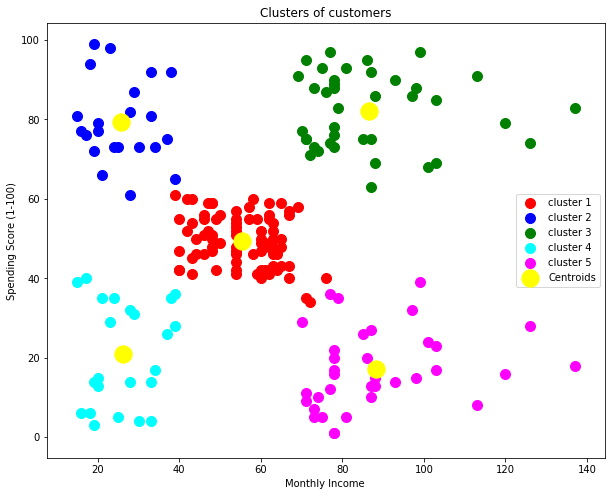

In [11]:
# Visualising the clusters
plt.figure(figsize=(10,8))

plt.scatter(X[cluster_label == 0, 0], X[cluster_label == 0, 1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_label == 1, 0], X[cluster_label == 1, 1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_label == 2, 0], X[cluster_label == 2, 1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_label == 3, 0], X[cluster_label == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_label == 4, 0], X[cluster_label == 4, 1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualising the clusters
The cluster with high Monthly income and high Spending score can be called as **Target** group <br>
similarly the cluster with high income but low spending score can be called as **Careful** group<br>
and the cluster with low income and high spending score can be called as **Careless** group<br>
and cluster with low income and low spending score can be called as **Sensible** group <br>
and one that is in the middle is **Standard** group.


I have divided the customer into 5 segment namely:
1. Standard 
2. Careless
3. Target
4. Sensible
5. Careful

#### How this will help?

For new promotional offer, instead of calling each customer, first we will focus on "Target" group of customer.

Different type of promotional offer will we suited for different group of customer:-<br>
For example a sense of compitition to win a prize will be suited for one type of cluster while, buy one and get one free will be suited for another group of customer.

Based on each cluster of customer we can choose different strategy of promotion.